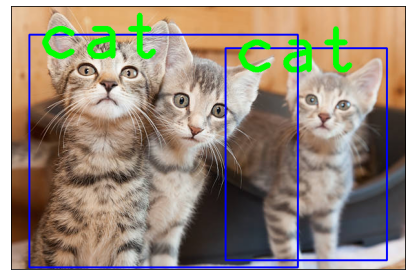

In [5]:
import cv2
import matplotlib.pyplot as plt

config_file = 'object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'object_detection/frozen_inference_graph.pb'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

classLabels = []
file_name = 'object_detection/coco.names'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    
img = cv2.imread('/Users/gaston/Documents/Repositories/Image-Recognition-App/app/views/static/images/sample_images/cats.jpg')

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) #255/2
model.setInputMean((127.5, 127.5, 127.5)) # movilenet -> [-1,1]
model.setInputSwapRB(True)

ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

ClassIndex = ClassIndex - 1
classLabels[ClassIndex[0]], classLabels[ClassIndex[-1]]

font_scale = 7
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=7)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]); plt.yticks([]);
plt.tight_layout()
plt.show()

In [ ]:
import cv2
thres = 0.45 # Threshold to detect object
 
cap = cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)
cap.set(10,70)

classNames= []
classFile = 'ssd_mobilenet_v3_large_coco_2020_01_14/labels.txt'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('n').split('n')


configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'
 
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)
 
while True:
    success,img = cap.read()
    classIds, confs, bbox = net.detect(img,confThreshold=thres)
    print(classIds,bbox)
 
    if len(classIds) != 0:
        for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            cv2.rectangle(img,box,color=(0,255,0),thickness=2)
            cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
 
    cv2.imshow("Output",img)
    cv2.waitKey(1)